<a href="https://colab.research.google.com/github/akash-agni/DeepLearning/blob/main/Learning_PyTorch_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np

In [2]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)
testing_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
batch_size = 64

training_dataloader = DataLoader(training_data, batch_size=batch_size)
testing_dataloader = DataLoader(testing_data, batch_size=batch_size)

for X, y in training_dataloader:
  print(f"Shape of X [H, C, H, W] is: {X.shape}")
  print(f"Shape of y [N] is: {y.shape}")
  break

Shape of X [H, C, H, W] is: torch.Size([64, 1, 28, 28])
Shape of y [N] is: torch.Size([64])


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using {device} for training model")

Using cuda for training model


In [93]:
class NeuralNetwork(nn.Module):

  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.conv1 = nn.Conv2d(1, 8, 7)
    self.pool1 = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(8, 16, 3)
    self.conv3 = nn.Conv2d(16, 16, 3)
    self.flatten = nn.Flatten()
    self.full1 = nn.Linear(16 * 7 * 7, 64)
    self.full2 = nn.Linear(64, 32)
    self.full3 = nn.Linear(32, 10)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.pool1(self.relu(self.conv1(x)))
    #print(x.shape)
    x = self.relu(self.conv3(self.relu(self.conv2(x))))
    #print(x.shape)
    x = self.flatten(x)
    #print(x.shape)
    x = self.full3(self.relu(self.full2(self.relu(self.full1(x)))))
    #print(x.shape)
    logits = x
    return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (conv1): Conv2d(1, 8, kernel_size=(7, 7), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (full1): Linear(in_features=784, out_features=64, bias=True)
  (full2): Linear(in_features=64, out_features=32, bias=True)
  (full3): Linear(in_features=32, out_features=10, bias=True)
  (relu): ReLU()
)


In [94]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    pred = model(X)
    loss = loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [95]:
def test(dataloader, model):
  size = len(dataloader.dataset)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= size
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss:{test_loss:>8f} \n")

In [98]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

In [99]:
epochs = 10
for i  in range(epochs):
  print(f"Epoch {i+1}\n-------------------------------")
  train(training_dataloader, model, loss_fn, optimizer)
  test(testing_dataloader, model)
print('Done!')

Epoch 1
-------------------------------
loss: 0.154454  [    0/60000]
loss: 0.270978  [ 6400/60000]
loss: 0.100711  [12800/60000]
loss: 0.201309  [19200/60000]
loss: 0.204677  [25600/60000]
loss: 0.393324  [32000/60000]
loss: 0.228085  [38400/60000]
loss: 0.288128  [44800/60000]
loss: 0.227167  [51200/60000]
loss: 0.195695  [57600/60000]
Test Error: 
 Accuracy: 89.2%, Avg loss:0.004882 

Epoch 2
-------------------------------
loss: 0.138460  [    0/60000]
loss: 0.252676  [ 6400/60000]
loss: 0.078514  [12800/60000]
loss: 0.196158  [19200/60000]
loss: 0.196175  [25600/60000]
loss: 0.367882  [32000/60000]
loss: 0.210636  [38400/60000]
loss: 0.275664  [44800/60000]
loss: 0.224928  [51200/60000]
loss: 0.187602  [57600/60000]
Test Error: 
 Accuracy: 89.3%, Avg loss:0.004859 

Epoch 3
-------------------------------
loss: 0.132625  [    0/60000]
loss: 0.254548  [ 6400/60000]
loss: 0.075386  [12800/60000]
loss: 0.190225  [19200/60000]
loss: 0.190985  [25600/60000]
loss: 0.363320  [32000/60000

In [100]:
torch.save(model.state_dict(), 'model.pth')
print('Model saved to model.pth')

Model saved to model.pth


In [101]:
model = NeuralNetwork()
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

Predicted: "Pullover", Actual: "Pullover"


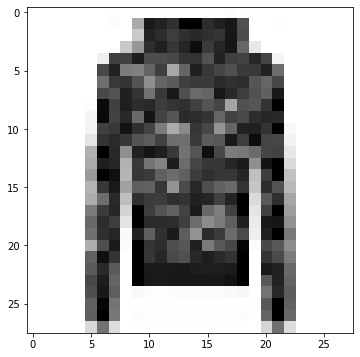

In [115]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
idx = np.random.randint(len(testing_data))
X, y = testing_data[idx][0], testing_data[idx][1]
with torch.no_grad():
  pred = model(X[None,:,:,:])
  predicted, actual = classes[pred[0].argmax(0)], classes[y]
  print(f'Predicted: "{predicted}", Actual: "{actual}"')
  fig, ax = plt.subplots(figsize=(6,6))
  ax.imshow(np.reshape(X.numpy(), (28, 28)), cmap='Greys')